# Generate radar pulse data for certain scattering distributions

Time is measured in units of $\tau$, the inverse bandwidth. However, sampling happens at a rate $\alpha /\tau$, where $\alpha\gg1$.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from dataclasses import dataclass

In [ ]:

class SignalGenerator:
    def __init__(self, tlist, flist):
        self.tlist = tlist
        self.flist = flist
        self.lims = [tlist[0], tlist[-1]]
        self.sampling_rate = len(tlist)/(tlist[-1] - tlist[0])

    tau = 1.0 # s
sampling_rate = 10 # Hz
noise = 20 # dBm the noise floor of the signal. 
lims = 50 # extent of plot in units of tau
tlist = np.linspace(-lims, lims, sampling_rate*lims*2)
# Compute the Fourier transform
rng = np.random()

f_sinc = fft.fft(np.sinc(tlist))


In [27]:
tau = 1.0 # s
sampling_rate = 10 # Hz
noise = 20 # dBm the noise floor of the signal. 
lims = 50 # extent of plot in units of tau
tlist = np.linspace(-lims, lims, sampling_rate*lims*2)
# Compute the Fourier transform
rng = np.random()

f_sinc = fft.fft(np.sinc(tlist))


frequencies = fft.fftfreq(tlist.size, d=1/sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

In [21]:
tlist.shape

(1000000,)

[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-2.0, 2.0),
 (-20.0, 20.0)]

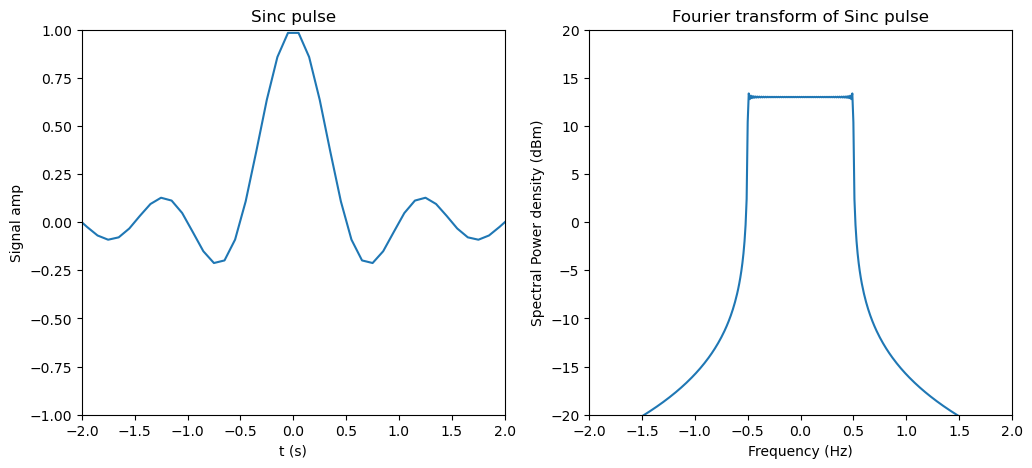

In [40]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 5))
ax[0].plot(tlist, np.sinc(2*tlist)) # to get unit bandwidth
ax[0].set(xlim=(-5, 5), ylim=(-1,1), xlabel='t (s)', ylabel='Signal amp', title='Sinc pulse')
ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))
ax[1].set(xlabel='Frequency (Hz)', ylabel='Spectral Power density (dBm)', title='Fourier transform of Sinc pulse', xlim=(-2,2), ylim=(-20, 20))

